In [24]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import glob

# Get CSV files list from a folder
path = "/Users/shakilrafi/Project_Small_Business_Schubert/"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, usecols=["InitialApprovalAmount","JobsReported"]) for file in csv_files)

# Concatenate all DataFrames
main_df = pd.concat(df_list, ignore_index=True)

In [25]:
import seaborn as sns

main_df.corr()

,InitialApprovalAmount,JobsReported
InitialApprovalAmount,1.000000,0.792347
JobsReported,0.792347,1.000000


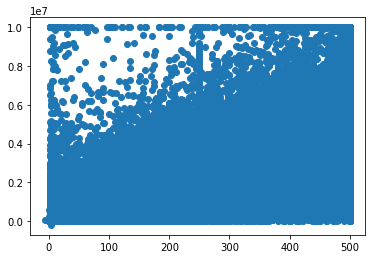

In [26]:
import matplotlib.pyplot as plt
plt.scatter(main_df["JobsReported"],main_df["InitialApprovalAmount"])

In [27]:
main_df = main_df[main_df["InitialApprovalAmount"]> 0]
main_df = main_df[main_df["JobsReported"]> 0]
main_df = main_df.dropna()

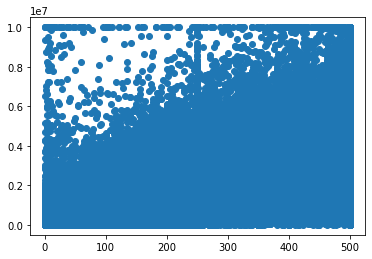

In [28]:
plt.scatter(main_df["JobsReported"],main_df["InitialApprovalAmount"])

In [29]:
main_df.isna().sum()

InitialApprovalAmount    0
JobsReported             0
dtype: int64

In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11468444 entries, 0 to 11468680
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   InitialApprovalAmount  float64
 1   JobsReported           float64
dtypes: float64(2)
memory usage: 262.5 MB


In [31]:
main_df.corr()

,InitialApprovalAmount,JobsReported
InitialApprovalAmount,1.000000,0.792347
JobsReported,0.792347,1.000000


In [32]:
# from scipy import stats
# # experiment = main_df[(np.abs(stats.zscore(main_df["InitialApprovalAmount"])) < 2)]
# # experiment = main_df[(np.abs(stats.zscore(df["JobsReported"])) < 2)]
# plt.scatter(experiment["JobsReported"],experiment["InitialApprovalAmount"])

In [33]:
dfSample = main_df.sample(10000) # This is the importante line
xdataSample, ydataSample = dfSample["JobsReported"], dfSample["InitialApprovalAmount"]

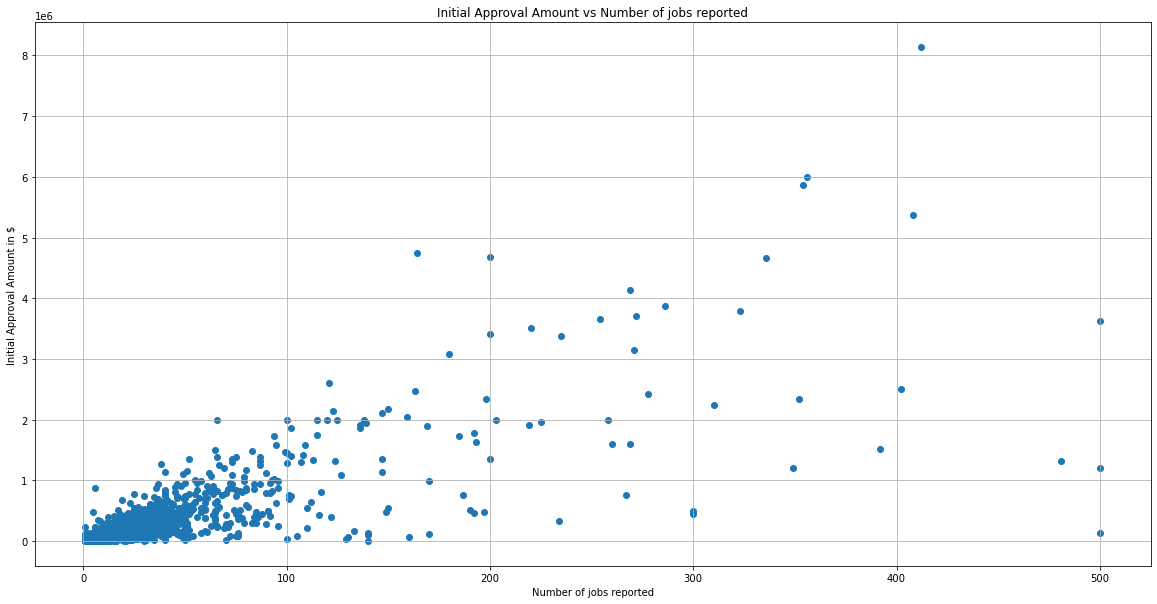

In [34]:
plt.figure(figsize=[20,10])
plt.scatter(dfSample["JobsReported"],dfSample["InitialApprovalAmount"])
plt.xlabel("Number of jobs reported")
plt.ylabel("Initial Approval Amount in $")
plt.title("Initial Approval Amount vs Number of jobs reported")
plt.grid()

/Users/shakilrafi/opt/anaconda3/envs/ASRI2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


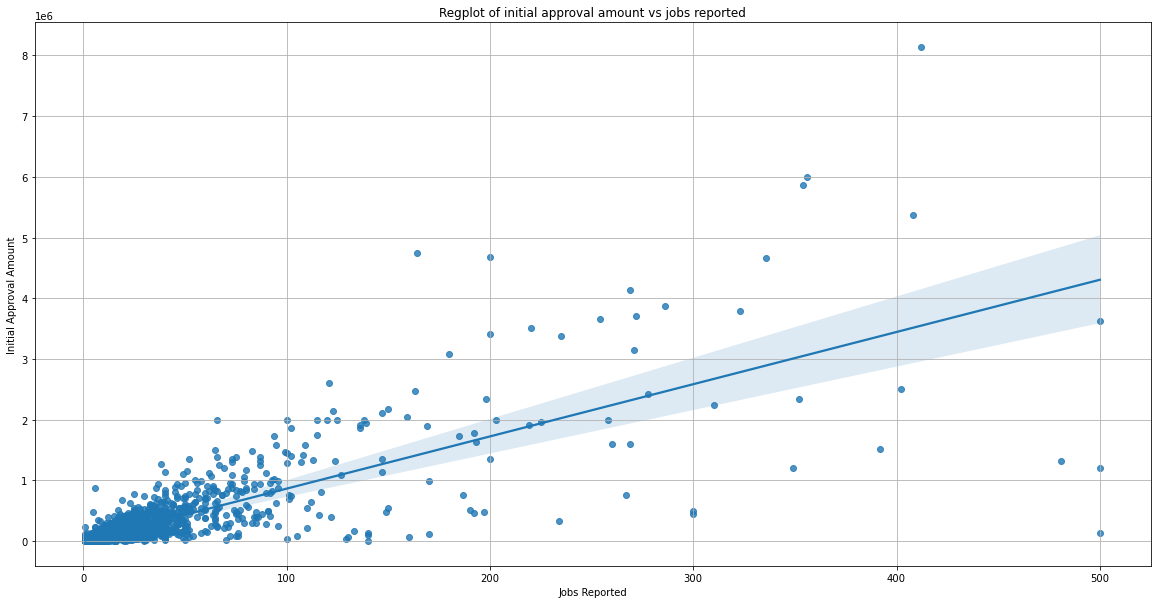

In [35]:
import seaborn as sns
plt.figure(figsize = [20,10])
p = sns.regplot(dfSample["JobsReported"], dfSample["InitialApprovalAmount"],dfSample)
p.set( xlabel = "Jobs Reported", ylabel = "Initial Approval Amount")
plt.title("Regplot of initial approval amount vs jobs reported")
plt.grid()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_reg = LinearRegression()

X = main_df[["JobsReported"]]
y = main_df[["InitialApprovalAmount"]]


X_train, X_test, y_train, y_test = train_test_split(X,y)

model = lin_reg.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.6257825250218936


In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics

cv = KFold(n_splits=10)

    #build multiple linear regression model
model = LinearRegression()

    #use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                            cv=cv, n_jobs=-1)

    #view mean absolute error
print(np.mean(np.abs(scores)))

38650.82647652089


In [51]:
sklearn.metric.scorers()

NameError: name 'sklearn' is not defined

In [37]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, y_pred)

0.6294593886663356

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

25332599876.783592

In [61]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
model = regressor.fit(X_train, y_train)

In [40]:
model.plot

AttributeError: 'DecisionTreeRegressor' object has no attribute 'plot'

In [62]:
y_pred = model.predict(X_test)

In [63]:
r2_score(y_test, y_pred)

0.6406840776955551

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics

cv = KFold(n_splits=10)

    #build multiple linear regression model
model = LinearRegression()

    #use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                            cv=cv, n_jobs=-1)

    #view mean absolute error
print(np.mean(np.abs(scores)))

38650.82647652089
